# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [189]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
from scipy.stats import linregress
from pathlib import Path
from importlib import reload  # credit: https://stackoverflow.com/questions/67378630/getting-error-while-using-grid-method-in-python

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [190]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [191]:
# Set the API base URL
units = 'metric'
base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
collection_date = datetime.date.today()

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{base_url}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # Reference: https://openweathermap.org/current#fields_json
        city_lat = city_weather['coord']['lat']  # coord.lat Latitude of the location
        city_lng = city_weather['coord']['lon']  # coord.lon Longitude of the location
        city_max_temp = city_weather['main']['temp_max']  # main.temp_max Maximum temperature at the moment. Metric: Celsius
        city_humidity = city_weather['main']['humidity']  # main.humidity Humidity, %
        city_clouds = city_weather['clouds']['all']  # clouds.all Cloudiness, %
        city_wind = city_weather['wind']['speed']  # wind.speed Wind speed. Metric: meter/sec
        city_country = city_weather['sys']['country']  # sys.country Country code (GB, JP etc.)
        city_date = city_weather['dt']  # dt Time of data calculation, unix, UTC

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | santana
Processing Record 2 of Set 1 | chonchi
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | saipan
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | codrington
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | egilsstadir
Processing Record 12 of Set 1 | talnakh
Processing Record 13 of Set 1 | huilong
Processing Record 14 of Set 1 | gardez
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | arenapolis
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | utrik
Processing Record 19 of Set 1 | korotchaevo
City not found. Skipping...
Processing Record 20 of Set 1 | walvis bay
Processing Record 21 of Set 1 | petropavlovsk-kamchatsky
Processing Record 22 of Set 1 | 

In [192]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [193]:
city_data_df.rename(columns={
    'Lat': 'Latitude',
    'Lng': 'Longitude',
    'Max Temp': 'Temperature'
}, inplace=True)

In [194]:
# Export the City_Data into a csv
city_data_df.to_csv(Path("output_data", "cities.csv"), index_label="City_ID")

In [195]:
# Read saved data
city_data_df = pd.read_csv(Path("output_data", "cities.csv"), index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,santana,-0.0583,-51.1817,26.10,94,75,1.03,BR,1714882848
1,chonchi,-42.6128,-73.8092,2.84,93,100,1.90,CL,1714883073
2,invercargill,-46.4000,168.3500,11.68,80,73,4.92,NZ,1714883073
3,adamstown,-25.0660,-130.1015,21.00,64,93,8.60,PN,1714883073
4,saipan,15.1355,145.7010,32.39,58,20,6.17,MP,1714883073


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

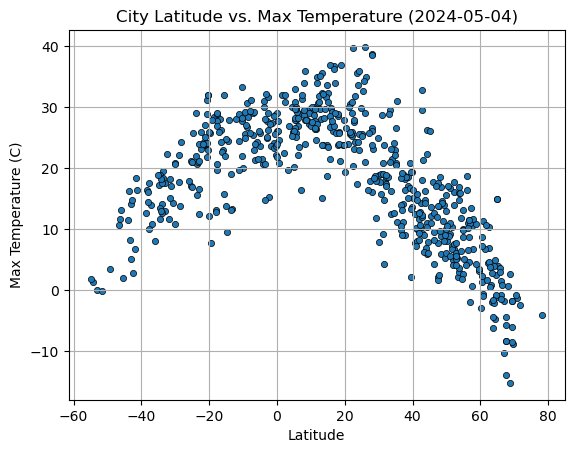

In [196]:
reload(plt)  # credit: https://stackoverflow.com/questions/67378630/getting-error-while-using-grid-method-in-python

# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x='Latitude', y='Temperature', edgecolors='black', linewidths=0.5)

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Latitude vs. Max Temperature ({collection_date})')

# Save the figure
plt.savefig(Path("output_data", "Fig1.png"))

# Show plot
plt.show()

#### Latitude Vs. Humidity

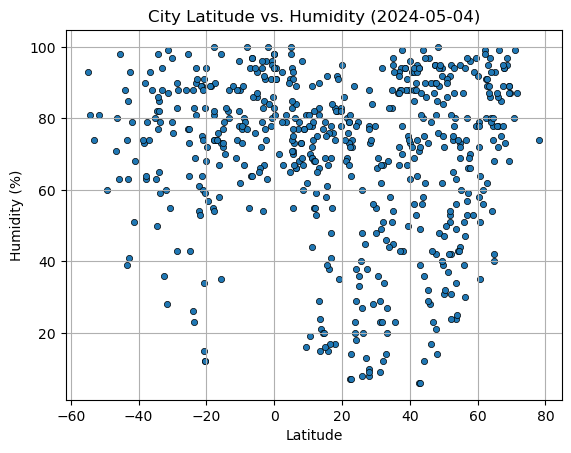

In [198]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x='Latitude', y='Humidity', edgecolors='black', linewidths=0.5)

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({collection_date})')

# Save the figure
plt.savefig(Path("output_data", "Fig2.png"))

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

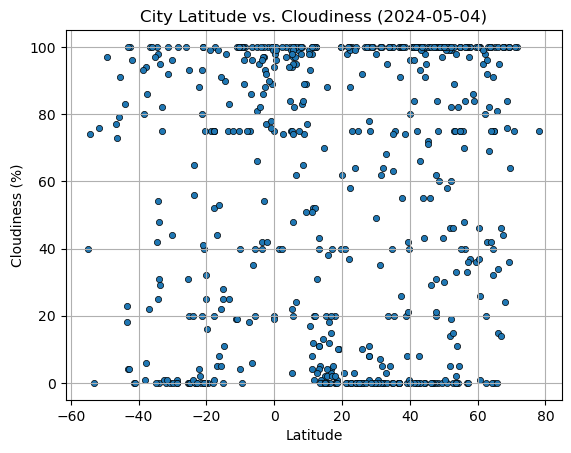

In [199]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x='Latitude', y='Cloudiness', edgecolors='black', linewidths=0.5)

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({collection_date})')

# Save the figure
plt.savefig(Path("output_data", "Fig3.png"))

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

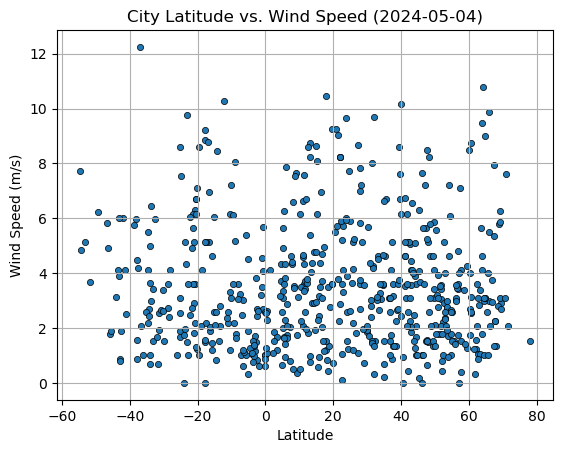

In [213]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x='Latitude', y='Wind Speed', edgecolors='black', linewidths=0.5)

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs. Wind Speed ({collection_date})')

# Save the figure
plt.savefig(Path("output_data", "Fig4.png"))

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [201]:
# Define a function to create Linear Regression plots
def linreg_plot(x_values, y_values, xlabel='', ylabel='', print_r=True):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    if print_r:
        print(f'The r-value is: {rvalue}')
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    x_offset = np.median(x_values)
    y_offset = np.median(y_values)

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_offset,y_offset),fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    return plt

In [202]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Latitude'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,saipan,15.1355,145.7010,32.39,58,20,6.17,MP,1714883073
5,albany,42.6001,-73.9662,14.23,71,100,2.24,US,1714882576
10,egilsstadir,65.2653,-14.3948,3.95,93,100,2.57,IS,1714883074
11,talnakh,69.4865,88.3972,-8.77,87,64,2.92,RU,1714882788
12,huilong,31.8111,121.6550,17.90,94,100,4.27,CN,1714883074


In [203]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Latitude'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,santana,-0.0583,-51.1817,26.10,94,75,1.03,BR,1714882848
1,chonchi,-42.6128,-73.8092,2.84,93,100,1.90,CL,1714883073
2,invercargill,-46.4000,168.3500,11.68,80,73,4.92,NZ,1714883073
3,adamstown,-25.0660,-130.1015,21.00,64,93,8.60,PN,1714883073
6,codrington,-38.2667,141.9667,16.35,73,80,5.99,AU,1714883074


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8563251511573208


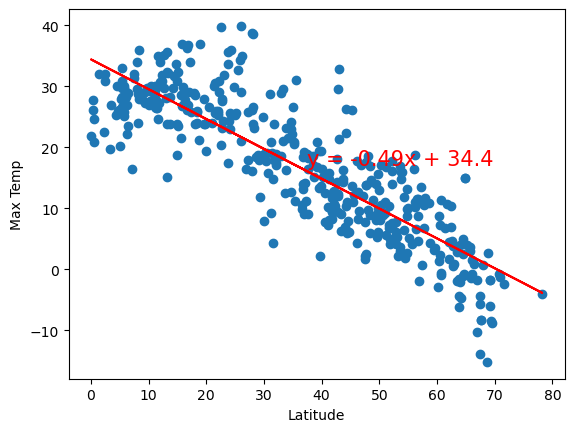

In [204]:
# Linear regression on Northern Hemisphere
linreg_plot(northern_hemi_df['Latitude'], northern_hemi_df['Temperature'], xlabel='Latitude', ylabel='Max Temp').show()

The r-value is: 0.7321546501100331


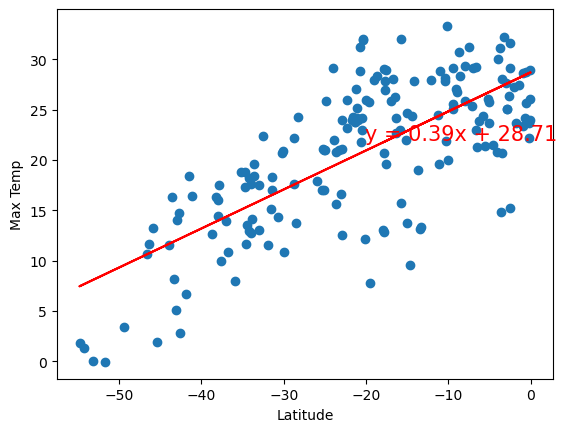

In [205]:
# Linear regression on Southern Hemisphere
linreg_plot(southern_hemi_df['Latitude'], southern_hemi_df['Temperature'], xlabel='Latitude', ylabel='Max Temp').show()

# TODO:
**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1046650987428392


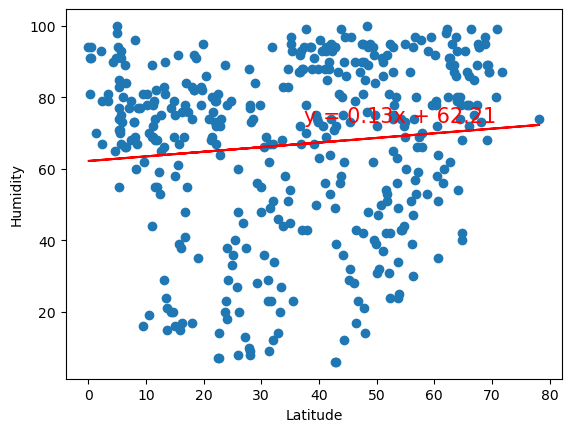

In [206]:
# Northern Hemisphere
linreg_plot(northern_hemi_df['Latitude'], northern_hemi_df['Humidity'], xlabel='Latitude', ylabel='Humidity').show()

The r-value is: 0.1781367386913819


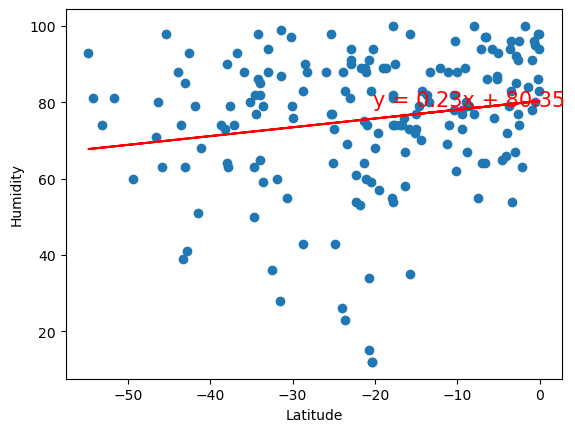

In [207]:
# Southern Hemisphere
linreg_plot(southern_hemi_df['Latitude'], southern_hemi_df['Humidity'], xlabel='Latitude', ylabel='Humidity').show()

# TODO:

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.12114570740142754


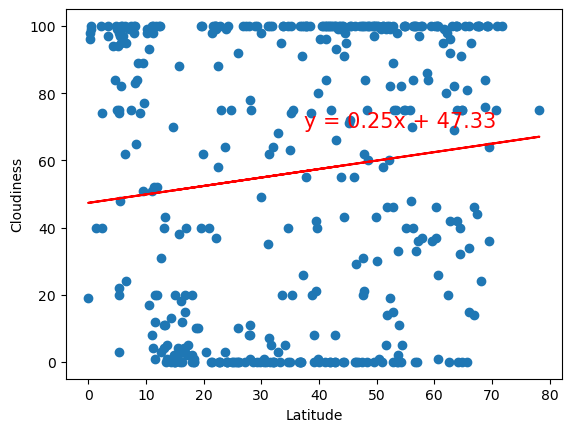

In [208]:
# Northern Hemisphere
linreg_plot(northern_hemi_df['Latitude'], northern_hemi_df['Cloudiness'], xlabel='Latitude', ylabel='Cloudiness').show()

The r-value is: 0.21024335935246768


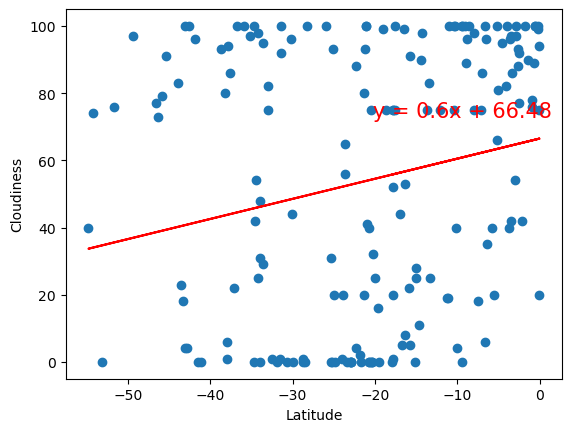

In [209]:
# Southern Hemisphere
linreg_plot(southern_hemi_df['Latitude'], southern_hemi_df['Cloudiness'], xlabel='Latitude', ylabel='Cloudiness').show()

# TODO:

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.04297205833914736


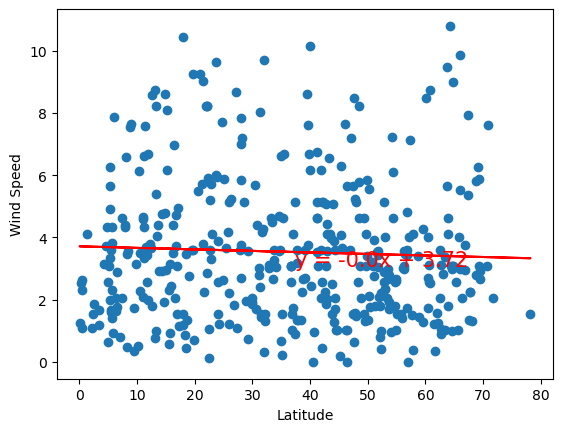

In [210]:
# Northern Hemisphere
linreg_plot(northern_hemi_df['Latitude'], northern_hemi_df['Wind Speed'], xlabel='Latitude', ylabel='Wind Speed').show()

The r-value is: -0.1968741854826045


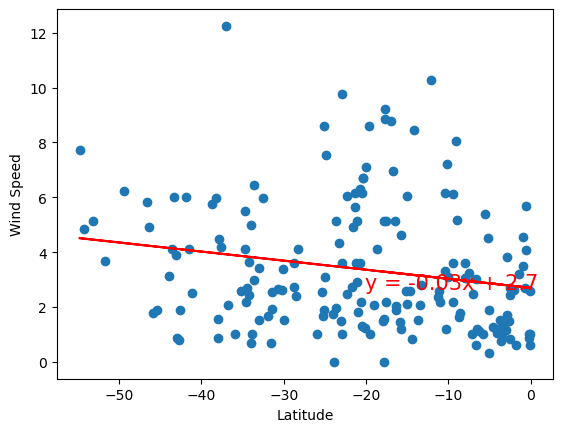

In [211]:
# Southern Hemisphere
linreg_plot(southern_hemi_df['Latitude'], southern_hemi_df['Wind Speed'], xlabel='Latitude', ylabel='Wind Speed').show()

# TODO:

**Discussion about the linear relationship:** YOUR RESPONSE HERE